# 7.1 PyTorch

This notebook is an adaptation of the PyTorch Tutorial of Patrick Loeber which you can find [here](https://github.com/python-engineer/pytorchTutorial) (MIT License - Copyright (c) 2020 Patrick Loeber).

What is PyTorch?
- One of the most popular modern deep learning frameworks (next to Tensorflow, JAX)

Check out this Free Online Course to learn more:
- [Deep learning with PyTorch Free Online Course](https://www.youtube.com/watch?v=c36lUUr864M&t=8387s)

In [64]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [2]:
torch.cuda.is_available()

False

## Tensor Basics

Tensors are generalizations of matrices to the N-dimensional space.

In [4]:
x = torch.empty(2, 2, 2, 3)
print(x)

tensor([[[[-1.9930e-03,  4.5640e-41,  8.0532e-39],
          [ 3.0813e-41, -3.5455e-31,  4.5640e-41]],

         [[-4.7037e-22,  4.5640e-41, -1.3589e-03],
          [ 4.5640e-41, -1.0792e-03,  4.5640e-41]]],


        [[[-1.0841e+32,  4.5639e-41, -1.0841e+32],
          [ 4.5639e-41, -1.2222e-03,  4.5640e-41]],

         [[-3.5455e-31,  4.5640e-41, -3.5456e-31],
          [ 4.5640e-41, -3.5456e-31,  4.5640e-41]]]])


In [5]:
x = torch.rand(3, 5)
print(x)

tensor([[0.4497, 0.3614, 0.5639, 0.0315, 0.7798],
        [0.0888, 0.6610, 0.2116, 0.3251, 0.9207],
        [0.2005, 0.8838, 0.3763, 0.6784, 0.9023]])


In [6]:
x = torch.zeros(2, 2)
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [7]:
print(x.dtype)

torch.float32


In [8]:
x = torch.ones(2, 2, dtype=torch.int)
print(x.dtype)

torch.int32


In [9]:
print(x.size())

torch.Size([2, 2])


In [10]:
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


In [11]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
z = x + y
print(x)
print(y)
print(z)

tensor([[0.1585, 0.8353],
        [0.8681, 0.8932]])
tensor([[0.7576, 0.6090],
        [0.5286, 0.6291]])
tensor([[0.9161, 1.4443],
        [1.3967, 1.5223]])


In [12]:
x = torch.rand(5, 3)
print(x)
print(x[:, 0])
print(x[1,1].item())

tensor([[0.8628, 0.5960, 0.3563],
        [0.5111, 0.3448, 0.8360],
        [0.5998, 0.1393, 0.9871],
        [0.5946, 0.8876, 0.7532],
        [0.3101, 0.9496, 0.4567]])
tensor([0.8628, 0.5111, 0.5998, 0.5946, 0.3101])
0.34479236602783203


In [13]:
x = torch.rand(4, 4)
print(x)
y = x.view(16)
print(y)
y = x.view(-1, 8)
print(y)

tensor([[0.6380, 0.8570, 0.1222, 0.1891],
        [0.3010, 0.2032, 0.8739, 0.8386],
        [0.1223, 0.6211, 0.3750, 0.0056],
        [0.5722, 0.5467, 0.0217, 0.6983]])
tensor([0.6380, 0.8570, 0.1222, 0.1891, 0.3010, 0.2032, 0.8739, 0.8386, 0.1223,
        0.6211, 0.3750, 0.0056, 0.5722, 0.5467, 0.0217, 0.6983])
tensor([[0.6380, 0.8570, 0.1222, 0.1891, 0.3010, 0.2032, 0.8739, 0.8386],
        [0.1223, 0.6211, 0.3750, 0.0056, 0.5722, 0.5467, 0.0217, 0.6983]])


In [14]:
a = torch.ones(5)
print(type(a))
b = a.numpy()
print(type(b))
print(a)
print(b)

# both objects share the same memory location when the tensor is on cpu
a += 1
print(a)
print(b)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [15]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)
a += 1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [16]:
x = torch.ones(5, requires_grad=True) # calculate gradients for this vector in the optimization step
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


## Autograd

Calculating gradients automatically for the optimization. PyTorch will create a computation graph for backpropagation.

In [17]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x + 2
print(y)

tensor([-2.0892,  0.1571, -0.3457], requires_grad=True)
tensor([-0.0892,  2.1571,  1.6543], grad_fn=<AddBackward0>)


In [18]:
z = (y*y*2)
# z = z.mean()
print(z)

tensor([0.0159, 9.3060, 5.4733], grad_fn=<MulBackward0>)


In [19]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) # dz/dx -> chain rule dz/dy * dy/dx

In [20]:
print(x.grad)

tensor([-3.5674e-02,  8.6283e+00,  6.6171e-03])


In [21]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([-0.0892,  2.1571,  1.6543])


In [22]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [23]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

In [24]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
 
# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Gradient Descent using Autograd

Linear Regression: Manual

In [25]:
import numpy as np

# f = w * x

# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32) # feature vector
Y = np.array([2, 4, 6, 8], dtype=np.float32) # label vector w. ground truth
w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted -y)**2).mean()

# gradient
# MSE = 1/N * (w*x-y)**2
# dJ/dw = 1/N 2x (w*x-y)
def gradient(x, y, y_predicted):
    return np.dot(2 * x, y_predicted-y)/len(x)

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 20
for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018677
epoch 5: w = 1.113, loss = 8.17471600
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698175
epoch 15: w = 1.825, loss = 0.31684822
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


In [26]:
import numpy as np

# f = w * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # feature vector
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # label vector w. ground truth
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted -y)**2).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 20
for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad(): # exclude from computational graph
        w -= learning_rate * w.grad 
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


## PyTorch Training Pipeline

1) Design model (input_size, output_size, forward pass)
2) Construct loss and optimizer
3) Training loop
   - forward pass: compute prediction
   - backward pass: compute gradients
   - update weights

In [27]:
import numpy as np
import torch.nn as nn

# f = w * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # feature vector
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # label vector w. ground truth
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE


print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 20

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate) # stochastic gradient descent

for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 2 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


In [28]:
import numpy as np
import torch.nn as nn

# f = w * x

# f = 2 * x
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) # feature vector
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32) # label vector w. ground truth

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim, bias):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim, bias)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size, False)

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

# Training
learning_rate = 0.01
n_epochs = 20

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stochastic gradient descent

for epoch in range(n_epochs):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 2 == 0:
        [w,] = model.parameters()
        print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

4 1
Prediction before training: f(5) = 4.729
epoch 1: w = 1.104, loss = 8.33417797
epoch 3: w = 1.353, loss = 4.35049200
epoch 5: w = 1.532, loss = 2.27098441
epoch 7: w = 1.662, loss = 1.18546796
epoch 9: w = 1.756, loss = 0.61882126
epoch 11: w = 1.824, loss = 0.32302868
epoch 13: w = 1.873, loss = 0.16862285
epoch 15: w = 1.908, loss = 0.08802202
epoch 17: w = 1.933, loss = 0.04594808
epoch 19: w = 1.952, loss = 0.02398521
Prediction after training: f(5) = 9.796


## Linear Regression

1) Design model (input_size, output_size, forward pass)
2) Construct loss and optimizer
3) Training loop
   - forward pass: compute prediction
   - backward pass: compute gradients
   - update weights

epoch:10, loss = 4468.4438
epoch:20, loss = 3330.6206
epoch:30, loss = 2507.8462
epoch:40, loss = 1912.2266
epoch:50, loss = 1480.6027
epoch:60, loss = 1167.5226
epoch:70, loss = 940.2293
epoch:80, loss = 775.0817
epoch:90, loss = 654.9987
epoch:100, loss = 567.6231


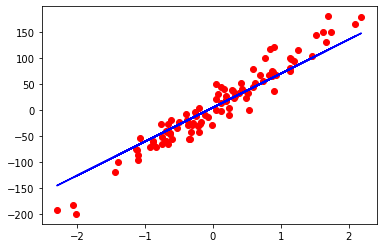

In [29]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
n_epochs = 100

for epoch in range(n_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch:{epoch+1}, loss = {loss.item():.4f}")
        
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

## Logistic Regression

1) Design model (input_size, output_size, forward pass)
2) Construct loss and optimizer
3) Training loop
   - forward pass: compute prediction
   - backward pass: compute gradients
   - update weights

In [30]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler() # 0 mean unit variance
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
n_epochs = 100
for epoch in range(n_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch {epoch+1}, loss = {loss.item():.4f}")
              
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"accuracy = {acc:.4f}")

569 30
epoch 10, loss = 0.6756
epoch 20, loss = 0.5385
epoch 30, loss = 0.4556
epoch 40, loss = 0.4001
epoch 50, loss = 0.3601
epoch 60, loss = 0.3297
epoch 70, loss = 0.3056
epoch 80, loss = 0.2859
epoch 90, loss = 0.2696
epoch 100, loss = 0.2557
accuracy = 0.9035


## Dataset & DataLoader

Gradient calculations on whole training dataset is very time-consuming. Better way is to divide samples in so called batches.

In [31]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [35]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt("../datasets/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):
        # len(dataset)
        return self.n_samples

In [38]:
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [39]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

In [40]:
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.4390e+01, 1.8700e+00, 2.4500e+00, 1.4600e+01, 9.6000e+01, 2.5000e+00,
         2.5200e+00, 3.0000e-01, 1.9800e+00, 5.2500e+00, 1.0200e+00, 3.5800e+00,
         1.2900e+03],
        [1.3520e+01, 3.1700e+00, 2.7200e+00, 2.3500e+01, 9.7000e+01, 1.5500e+00,
         5.2000e-01, 5.0000e-01, 5.5000e-01, 4.3500e+00, 8.9000e-01, 2.0600e+00,
         5.2000e+02],
        [1.3080e+01, 3.9000e+00, 2.3600e+00, 2.1500e+01, 1.1300e+02, 1.4100e+00,
         1.3900e+00, 3.4000e-01, 1.1400e+00, 9.4000e+00, 5.7000e-01, 1.3300e+00,
         5.5000e+02],
        [1.3050e+01, 3.8600e+00, 2.3200e+00, 2.2500e+01, 8.5000e+01, 1.6500e+00,
         1.5900e+00, 6.1000e-01, 1.6200e+00, 4.8000e+00, 8.4000e-01, 2.0100e+00,
         5.1500e+02]]) tensor([[1.],
        [3.],
        [3.],
        [2.]])


In [41]:
# training loop
n_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(n_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward, update
        if (i+1) % 5 == 0:
            print(f"epoch {epoch+1}/{n_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}")

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


## Dataset Transforms

In [42]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [43]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt("../datasets/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] # n_samples, 1
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        # dataset[0]
        sample = self.x[index], self.y[index]
    
        if self.transform:
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
    
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

In [44]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [45]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


## Softmax & Cross-Entropy

In [46]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("Softmax numpy:", outputs)

Softmax numpy: [0.65900114 0.24243297 0.09856589]


In [47]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print("Softmax torch:", outputs)

Softmax torch: tensor([0.6590, 0.2424, 0.0986])


In [48]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

Y = np.array([1, 0, 0]) # one hot encoded
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f"Loss 1 numpy: {l1:.4f}")
print(f"Loss 2 numpy: {l2:.4f}")

Loss 1 numpy: 0.3567
Loss 2 numpy: 2.3026


In [49]:
import torch.nn as nn

In [50]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0]) # not one hot encoded
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # n_samples x n_classes = 1x3; logits (softmax is applied within CrossEntropyLoss()
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f"Loss 1 torch: {l1.item():.4f}")
print(f"Loss 2 torch: {l2.item():.4f}")

Loss 1 torch: 0.4170
Loss 2 torch: 1.8406


In [51]:
_, predictions1 = torch.max(Y_pred_good, 1) # choose highest probability
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

tensor([0])
tensor([1])


Loss in PyTorch allows for multiple examples simultaneously!

In [52]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([2, 0, 1]) # not one hot encoded
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) # n_samples x n_classes = 3x3; logits (softmax is applied within CrossEntropyLoss()
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f"Loss 1 torch: {l1.item():.4f}")
print(f"Loss 2 torch: {l2.item():.4f}")

Loss 1 torch: 0.3018
Loss 2 torch: 1.6242


## Activation Functions

In [54]:
import torch.nn.functional as F

# Option 1 activation functions as modules
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
    
# option 2 activation function directly in forward pass
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = torch.relu(self.linear1(x)) # some activation functions only available in functional API, e.g. F.leaky_relu()
        out = torch.sigmoid(self.linear2(out))
        return out
        

## Feed Forward Neural Network

### Dataset & DataLoader Setup

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../datasets/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../datasets/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/raw

Dataset Sizes: {'train': 60000, 'val': 10000}
Class Names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of Classes: 10
Image Size: torch.Size([1, 28, 28])


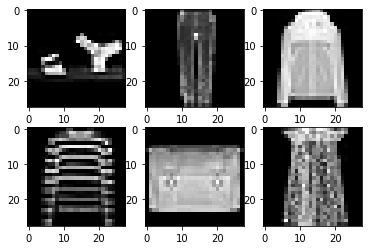

In [55]:
batch_size = 100

# Device config (GPU support)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Datasets & DataLoaders
datasets = {x: torchvision.datasets.FashionMNIST(root="../datasets", train=(x=="train"),
                                        download=True, transform=transforms.ToTensor())
                  for x in ["train", "val"]}

dataloaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=0)
              for x in ["train", "val"]}


dataset_sizes = {x: len(datasets[x]) for x in ["train", "val"]}
class_names = datasets["train"].classes
n_classes = len(class_names)
examples = iter(dataloaders["train"])
samples, labels = examples.next()
input_size = samples.shape[2] * samples.shape[3] # 784 -> 28x28 images flattened
print(f"Dataset Sizes: {dataset_sizes}")
print(f"Class Names: {class_names}")
print(f"Number of Classes: {n_classes}")
print(f"Image Size: {samples.shape[1:]}")

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [61]:
# Training loop (batch training)
def train_model(model, criterion, optimizer, n_epochs=5, greyscale_to_rgb=False):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for images, labels in dataloaders[phase]:
                if greyscale_to_rgb == True:
                    images = images.repeat(1, 3, 1, 1).to(device)
                else:
                    images = images.to(device) # push to GPU if available
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(images)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * images.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase.capitalize() + ' Phase -> '} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best Val Acc: {best_acc:4f}")

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [62]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, n_classes)
        
    def forward(self, x):
        x = x.reshape(-1, 28*28)
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [65]:
# Hyperparameters
hidden_size = 100
n_epochs = 15
learning_rate = 0.01

model = NeuralNet(input_size, hidden_size, n_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model = train_model(model, criterion, optimizer, n_epochs=n_epochs)

Epoch 1/15
----------
Train Phase ->  Loss: 0.6862 Acc: 0.7659
Val Phase ->  Loss: 0.5187 Acc: 0.8160

Epoch 2/15
----------
Train Phase ->  Loss: 0.4676 Acc: 0.8374
Val Phase ->  Loss: 0.4861 Acc: 0.8300

Epoch 3/15
----------
Train Phase ->  Loss: 0.4271 Acc: 0.8488
Val Phase ->  Loss: 0.4402 Acc: 0.8435

Epoch 4/15
----------
Train Phase ->  Loss: 0.3974 Acc: 0.8588
Val Phase ->  Loss: 0.4184 Acc: 0.8494

Epoch 5/15
----------
Train Phase ->  Loss: 0.3780 Acc: 0.8659
Val Phase ->  Loss: 0.4017 Acc: 0.8566

Epoch 6/15
----------
Train Phase ->  Loss: 0.3617 Acc: 0.8704
Val Phase ->  Loss: 0.4221 Acc: 0.8486

Epoch 7/15
----------
Train Phase ->  Loss: 0.3496 Acc: 0.8759
Val Phase ->  Loss: 0.3815 Acc: 0.8628

Epoch 8/15
----------
Train Phase ->  Loss: 0.3370 Acc: 0.8797
Val Phase ->  Loss: 0.3770 Acc: 0.8654

Epoch 9/15
----------
Train Phase ->  Loss: 0.3266 Acc: 0.8827
Val Phase ->  Loss: 0.3793 Acc: 0.8654

Epoch 10/15
----------
Train Phase ->  Loss: 0.3177 Acc: 0.8851
Val Phase

## Convolutional Neural Network

In [66]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # x -> n, 1, 28, 28
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 12, 12
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 4, 4
        x = x.view(-1, 16 * 4 * 4)            # -> n, 256
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

In [68]:
# Hyperparameters
n_epochs = 15
learning_rate = 0.01

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model = train_model(model, criterion, optimizer, n_epochs=n_epochs)

Epoch 1/15
----------
Train Phase ->  Loss: 0.9732 Acc: 0.6419
Val Phase ->  Loss: 0.5966 Acc: 0.7723

Epoch 2/15
----------
Train Phase ->  Loss: 0.5081 Acc: 0.8115
Val Phase ->  Loss: 0.4795 Acc: 0.8199

Epoch 3/15
----------
Train Phase ->  Loss: 0.4225 Acc: 0.8443
Val Phase ->  Loss: 0.4467 Acc: 0.8363

Epoch 4/15
----------
Train Phase ->  Loss: 0.3797 Acc: 0.8606
Val Phase ->  Loss: 0.3861 Acc: 0.8563

Epoch 5/15
----------
Train Phase ->  Loss: 0.3492 Acc: 0.8716
Val Phase ->  Loss: 0.3777 Acc: 0.8636

Epoch 6/15
----------
Train Phase ->  Loss: 0.3291 Acc: 0.8781
Val Phase ->  Loss: 0.3775 Acc: 0.8631

Epoch 7/15
----------
Train Phase ->  Loss: 0.3139 Acc: 0.8840
Val Phase ->  Loss: 0.3522 Acc: 0.8769

Epoch 8/15
----------
Train Phase ->  Loss: 0.3008 Acc: 0.8885
Val Phase ->  Loss: 0.3428 Acc: 0.8792

Epoch 9/15
----------
Train Phase ->  Loss: 0.2871 Acc: 0.8940
Val Phase ->  Loss: 0.3259 Acc: 0.8824

Epoch 10/15
----------
Train Phase ->  Loss: 0.2781 Acc: 0.8966
Val Phase

## Transfer Learning

What is Transfer Learning?
- Leverage a pretrained model that has been trained on huge amounts of similar data (e.g. here ImageNet)
- Fine-tune the model on your specific data
- Super popular nowadays, crucial for efficiency

In [71]:
# Hyperparameters
hidden_size = 100
n_epochs = 5
learning_rate = 0.01

model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model = train_model(model, criterion, optimizer, n_epochs=n_epochs, greyscale_to_rgb=True)

Epoch 1/5
----------
Train Phase ->  Loss: 0.3757 Acc: 0.8668
Val Phase ->  Loss: 0.2717 Acc: 0.9016

Epoch 2/5
----------
Train Phase ->  Loss: 0.2422 Acc: 0.9108
Val Phase ->  Loss: 0.2614 Acc: 0.9043

Epoch 3/5
----------
Train Phase ->  Loss: 0.2046 Acc: 0.9261
Val Phase ->  Loss: 0.2409 Acc: 0.9132

Epoch 4/5
----------
Train Phase ->  Loss: 0.1820 Acc: 0.9328
Val Phase ->  Loss: 0.2394 Acc: 0.9149

Epoch 5/5
----------
Train Phase ->  Loss: 0.1618 Acc: 0.9402
Val Phase ->  Loss: 0.2349 Acc: 0.9216

Training complete in 5m 60s
Best Val Acc: 0.921600
